In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from catboost import CatBoostClassifier
import pyttsx3
import pickle
plt.style.use ("dark_background")

In [94]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [96]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [97]:
list(data.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [98]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [99]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='Age', ylabel='HeartDisease'>

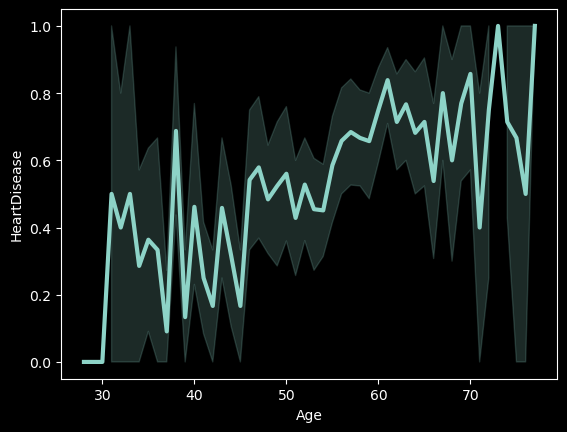

In [100]:
sns.lineplot(x =data['Age'] , y = data['HeartDisease'],data=data , linewidth = 3)

<Axes: xlabel='Age', ylabel='Sex'>

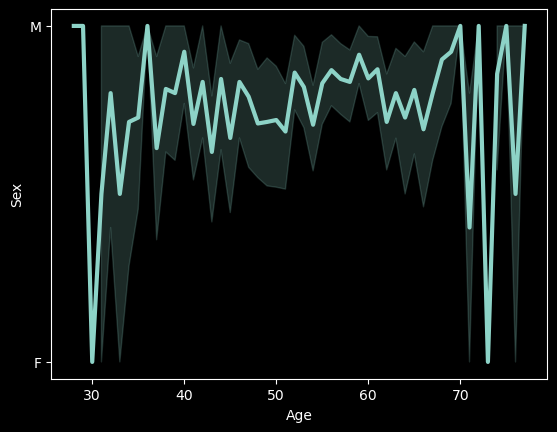

In [101]:
sns.lineplot(x =data['Age'] , y = data['Sex'],data=data , linewidth = 3)

(array([725.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

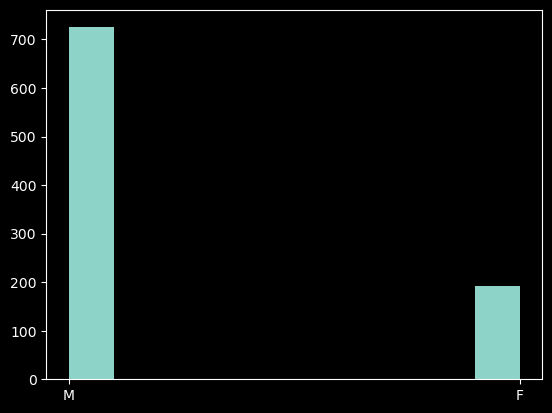

In [102]:
plt.hist(data['Sex'])

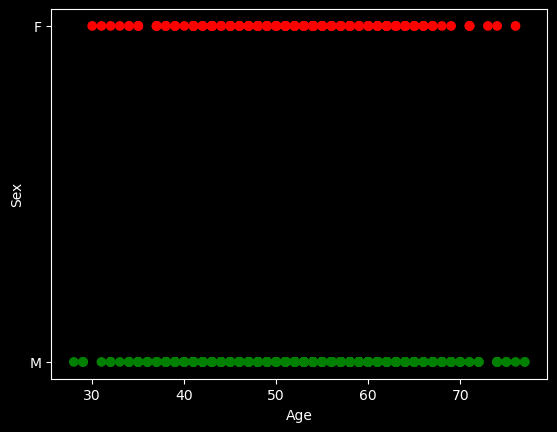

In [103]:
colors = data['Sex'].apply(lambda x: 'red' if x == 'F' else 'green')
plt.scatter(data['Age'], data['Sex'], color=colors)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

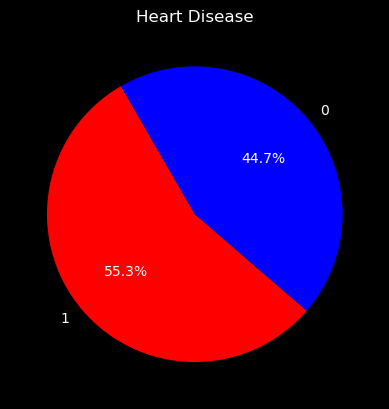

In [104]:
HeartDisease = data['HeartDisease'].value_counts()
plt.pie(HeartDisease, labels=HeartDisease.index,startangle = 120 , autopct='%1.1f%%' , colors = ["red","blue"])
plt.title('Heart Disease')
plt.show()

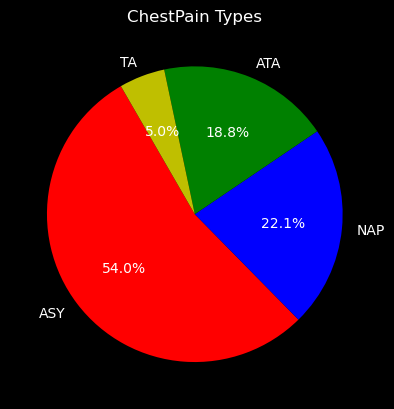

In [105]:
ChestPainType = data['ChestPainType'].value_counts()
plt.pie(ChestPainType, labels=ChestPainType.index,startangle = 120 , autopct='%1.1f%%' , colors = ["red","blue","Green","y"])
plt.title('ChestPain Types')
plt.show()

In [106]:
import plotly.express as px
fig = px.bar(data, x=data["Sex"], y=data["HeartDisease"],color = data["HeartDisease"], barmode="group")
fig.show()

In [107]:
fig = px.strip(data, x="Age", y="ChestPainType", orientation="h", color="ChestPainType")
fig.show()

In [108]:
fig = px.strip(data, x="Age", y="Sex", orientation="h", color="Sex")
fig.show()

<Axes: ylabel='Frequency'>

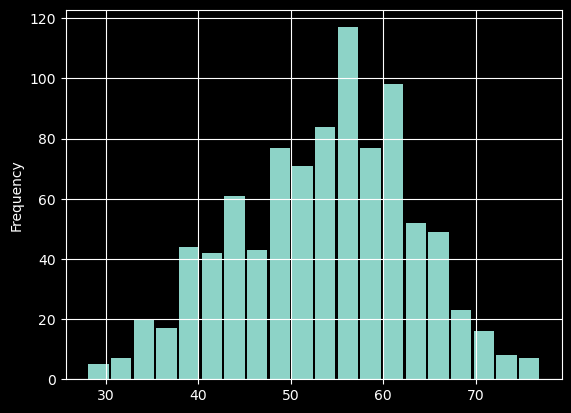

In [109]:
data['Age'].plot.hist(grid=True, bins=20, rwidth=0.9)

(array([173.,   0.,   0., 203.,   0.,   0., 496.,   0.,   0.,  46.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

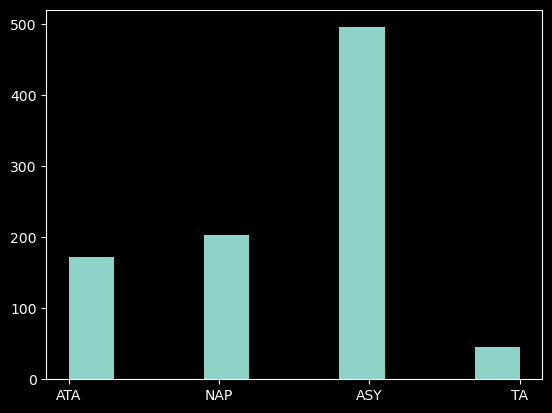

In [110]:
plt.hist(data['ChestPainType'])

C:\Users\mahmo\AppData\Local\Temp\ipykernel_5980\3111195173.py:30: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



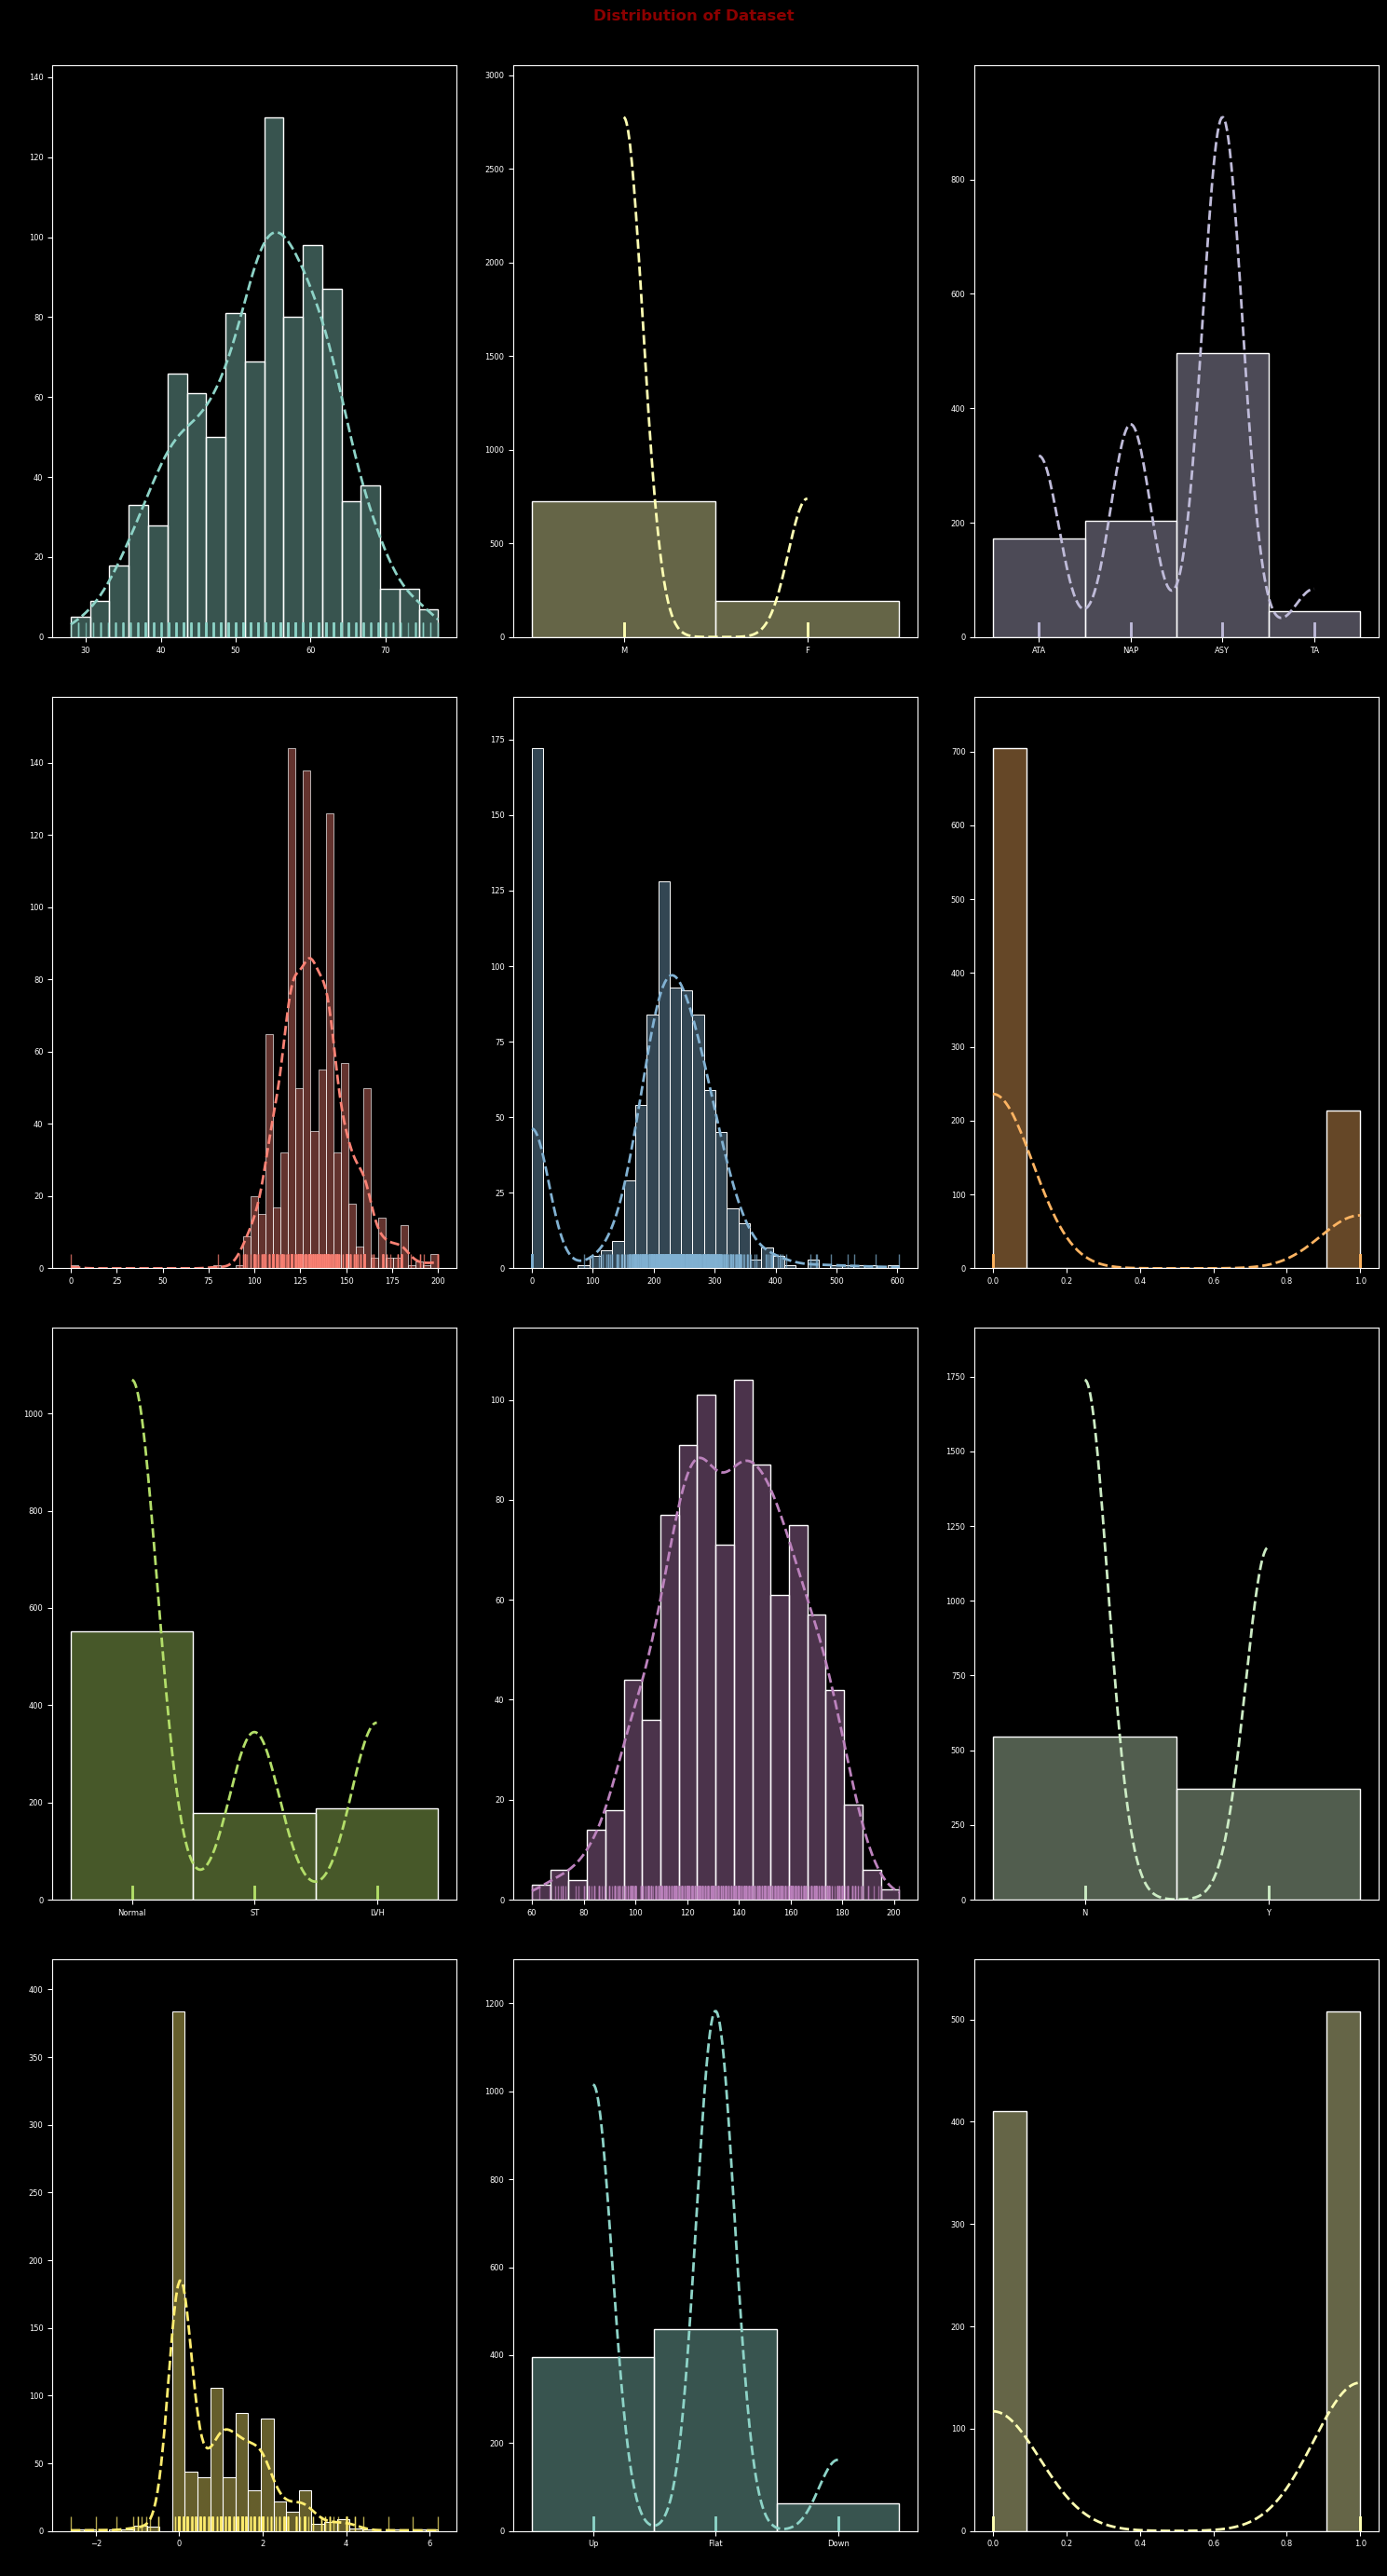

In [111]:
# Creating Subplots
fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 30))
axes = axes.flat

color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(data):
    sns.histplot(data,
               x = num_col,
               stat = 'count',
               kde = True,
               color = color_cycle[i % num_colors]["color"],
               line_kws = {'linewidth': 2,
                           'linestyle':'dashed'},
               alpha = 0.4,
               ax = axes[i])
    sns.rugplot(data,
              x = num_col,
              color = color_cycle[i % num_colors]["color"],
              ax = axes[i], alpha = 0.7)
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
    axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
    axes[i].tick_params(labelsize = 6)

fig.suptitle('Distribution of Dataset', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 0.92)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

# Encoding

In [112]:
objects = data.select_dtypes(include=['object'])
objects

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [113]:
ints = data.select_dtypes(exclude=['object'])
ints

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [114]:
LE = LabelEncoder()
for i in (objects):
    objects[i] = LE.fit_transform(objects[i])
data = pd.concat([ints,objects],axis=1)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,3,1,0,1
914,68,144,193,1,141,3.4,1,1,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,1,1,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1


<Axes: >

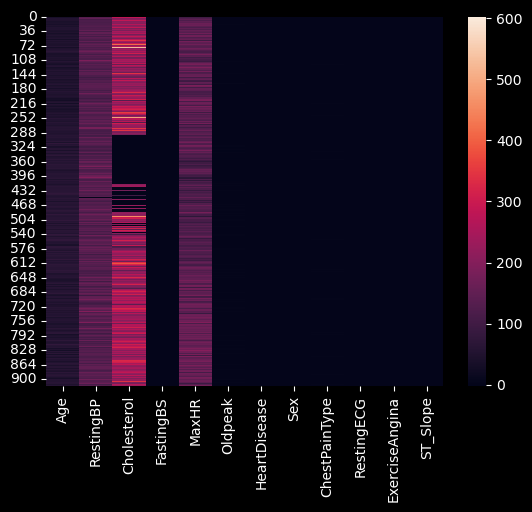

In [115]:
sns.heatmap(data)

<Axes: ylabel='Count'>

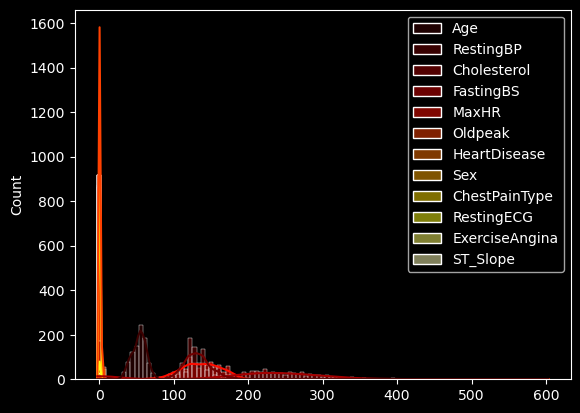

In [116]:
sns.histplot(data=data,kde=True,palette='hot')

In [117]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.781046,0.989107,0.404139,1.361656
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.956519,0.631671,0.490992,0.607056
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000


<IPython.core.display.Javascript object>

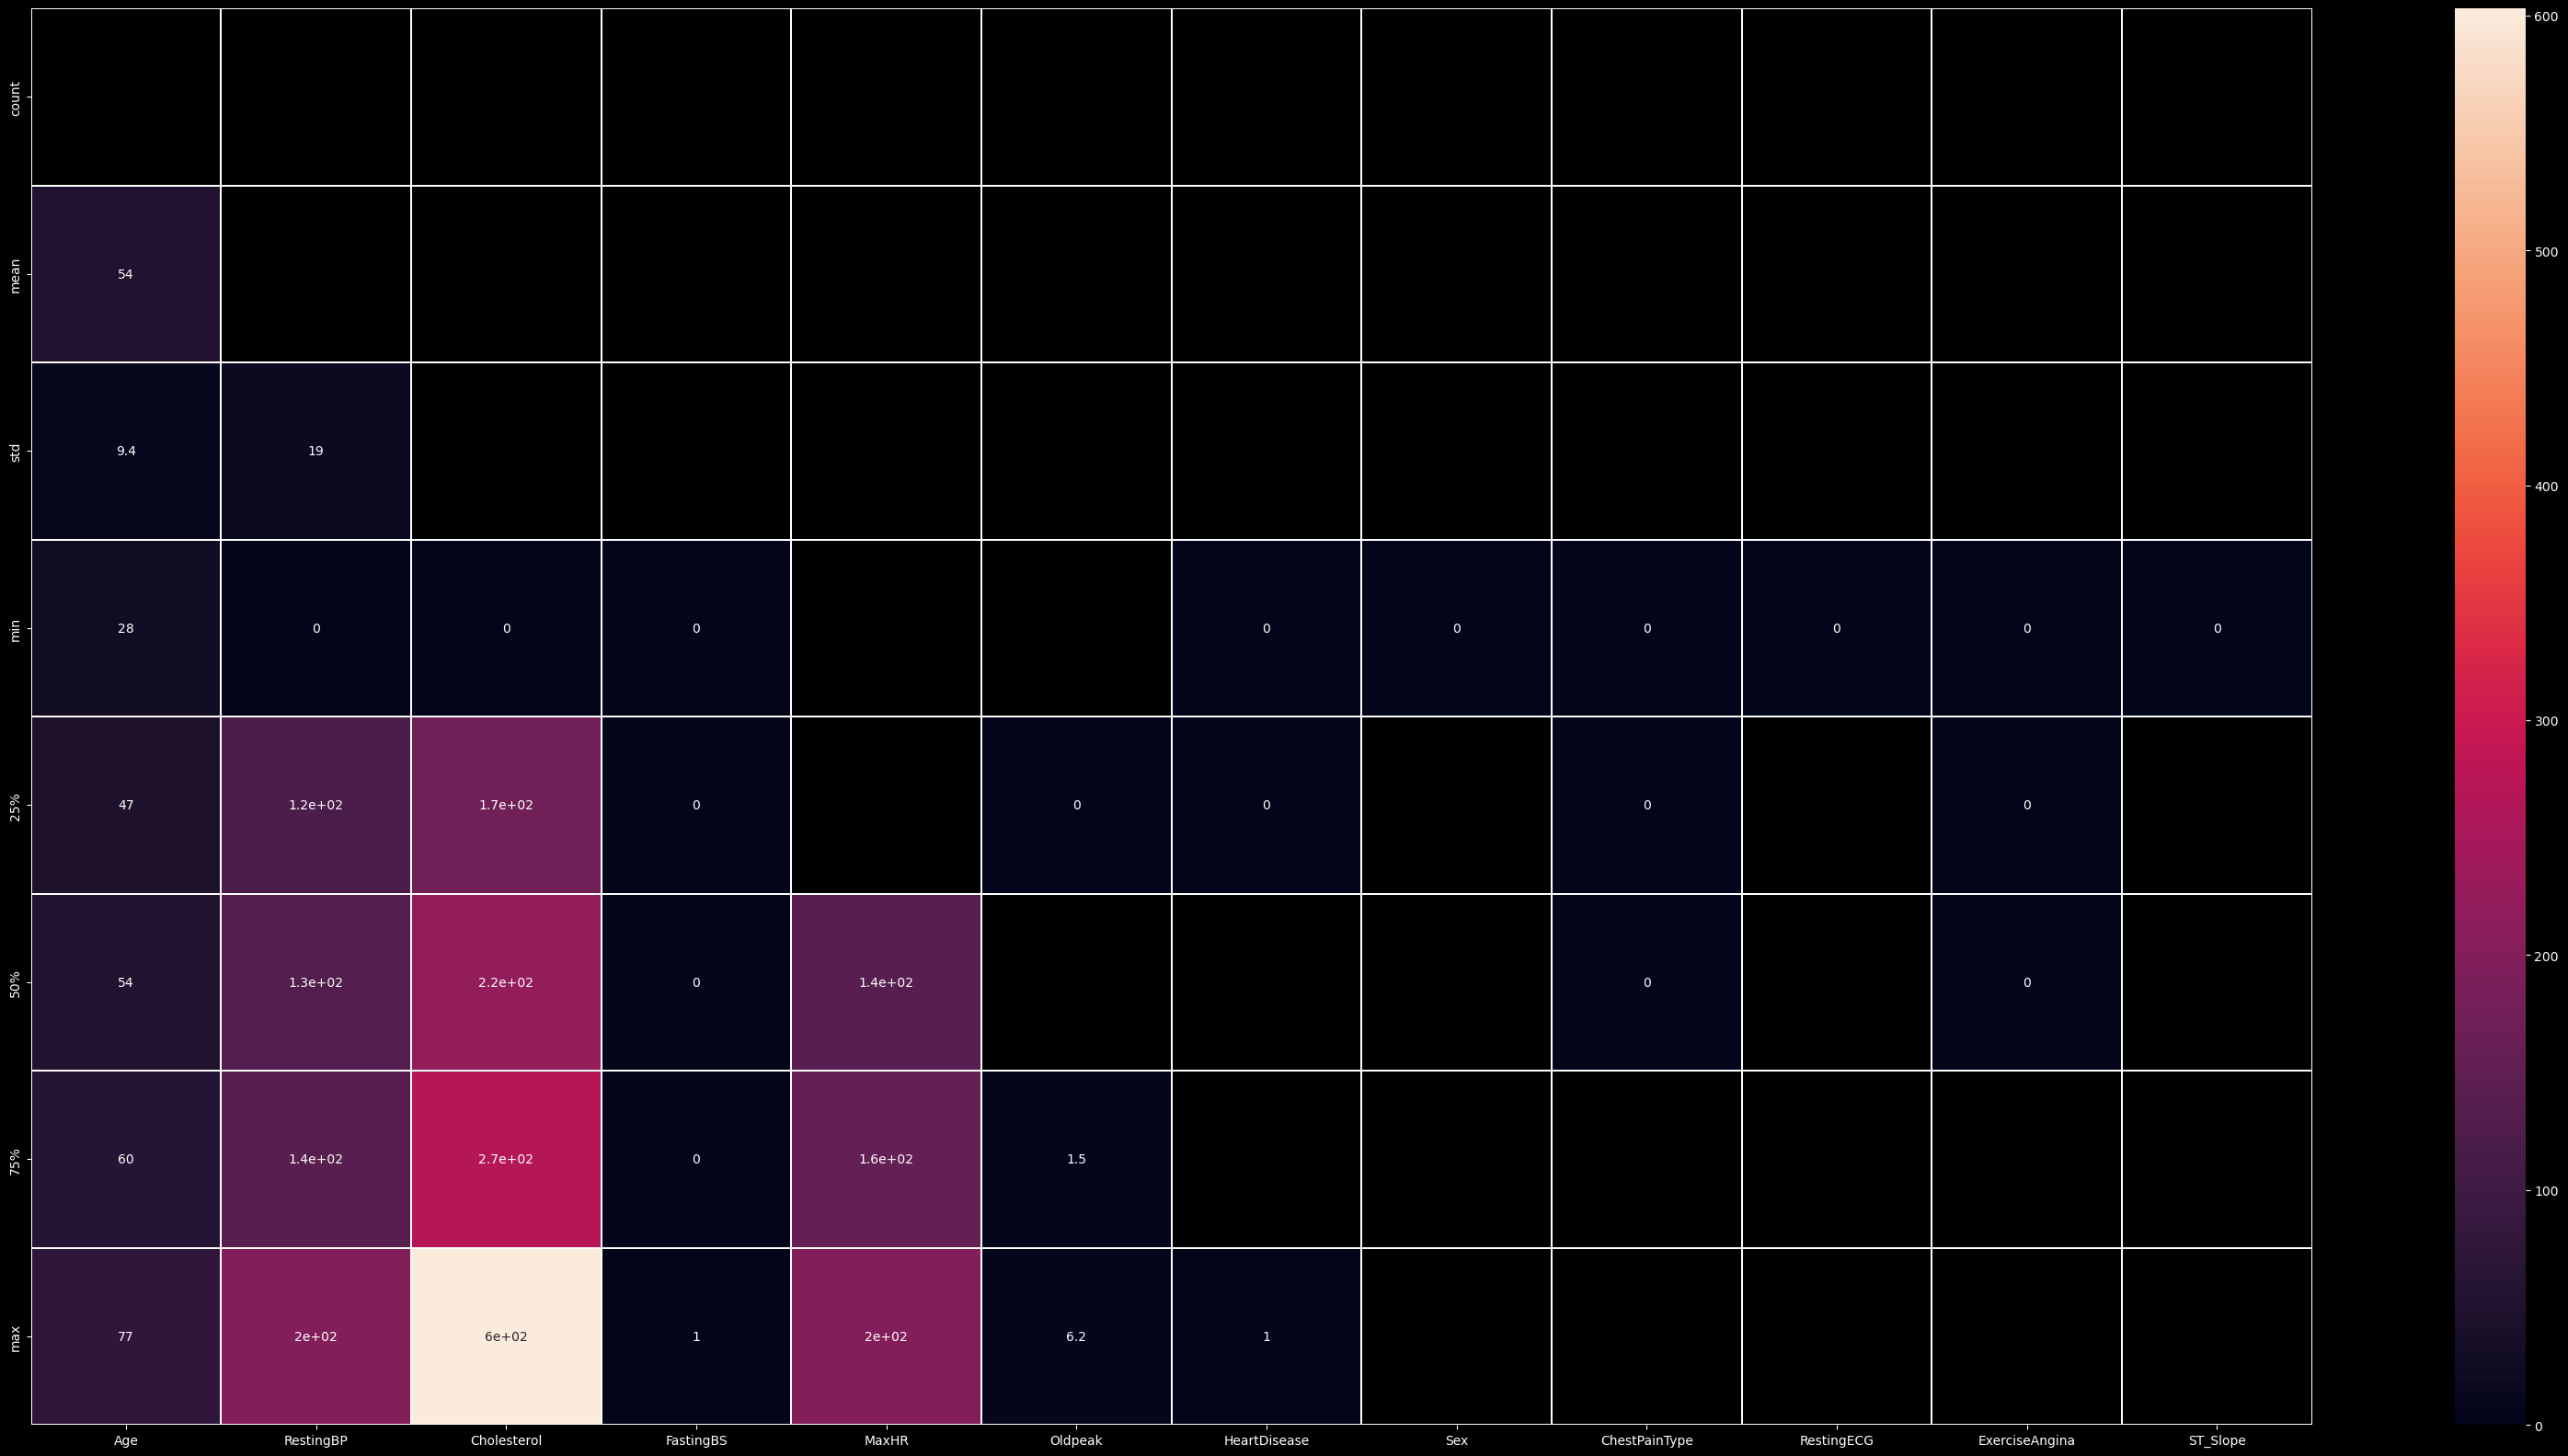

In [118]:
plt.figure(figsize=(40, 20))
matrix = np.triu(data.describe())
sns.heatmap(data.describe(), annot=True, linewidth=.10, mask=matrix);

<Axes: ylabel='Count'>

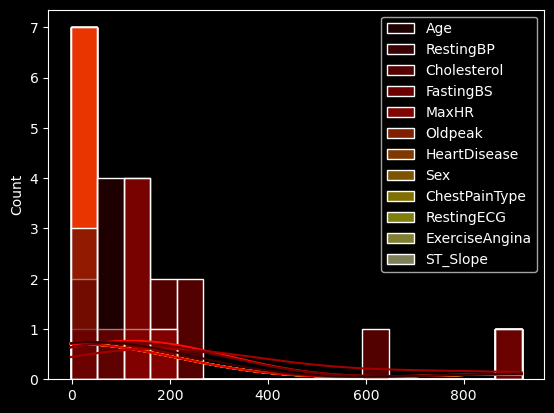

In [119]:
sns.histplot(data=data.describe(),kde=True,palette='hot')

In [120]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.077150,-0.007484,0.215793,-0.268264
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.020647,0.022656,0.155101,-0.075162
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092,0.067880,-0.196544,-0.034166,0.111471
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.073151,0.087050,0.060451,-0.175774
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.289123,-0.179276,-0.370425,0.343419
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.177377,-0.020438,0.408752,-0.501921
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.386828,0.057384,0.494282,-0.558771
Sex,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.126559,0.071552,0.190664,-0.150693
ChestPainType,-0.077150,-0.020647,0.067880,-0.073151,0.289123,-0.177377,-0.386828,-0.126559,1.000000,-0.072537,-0.354727,0.213521
RestingECG,-0.007484,0.022656,-0.196544,0.087050,-0.179276,-0.020438,0.057384,0.071552,-0.072537,1.000000,0.077500,-0.006778


<IPython.core.display.Javascript object>

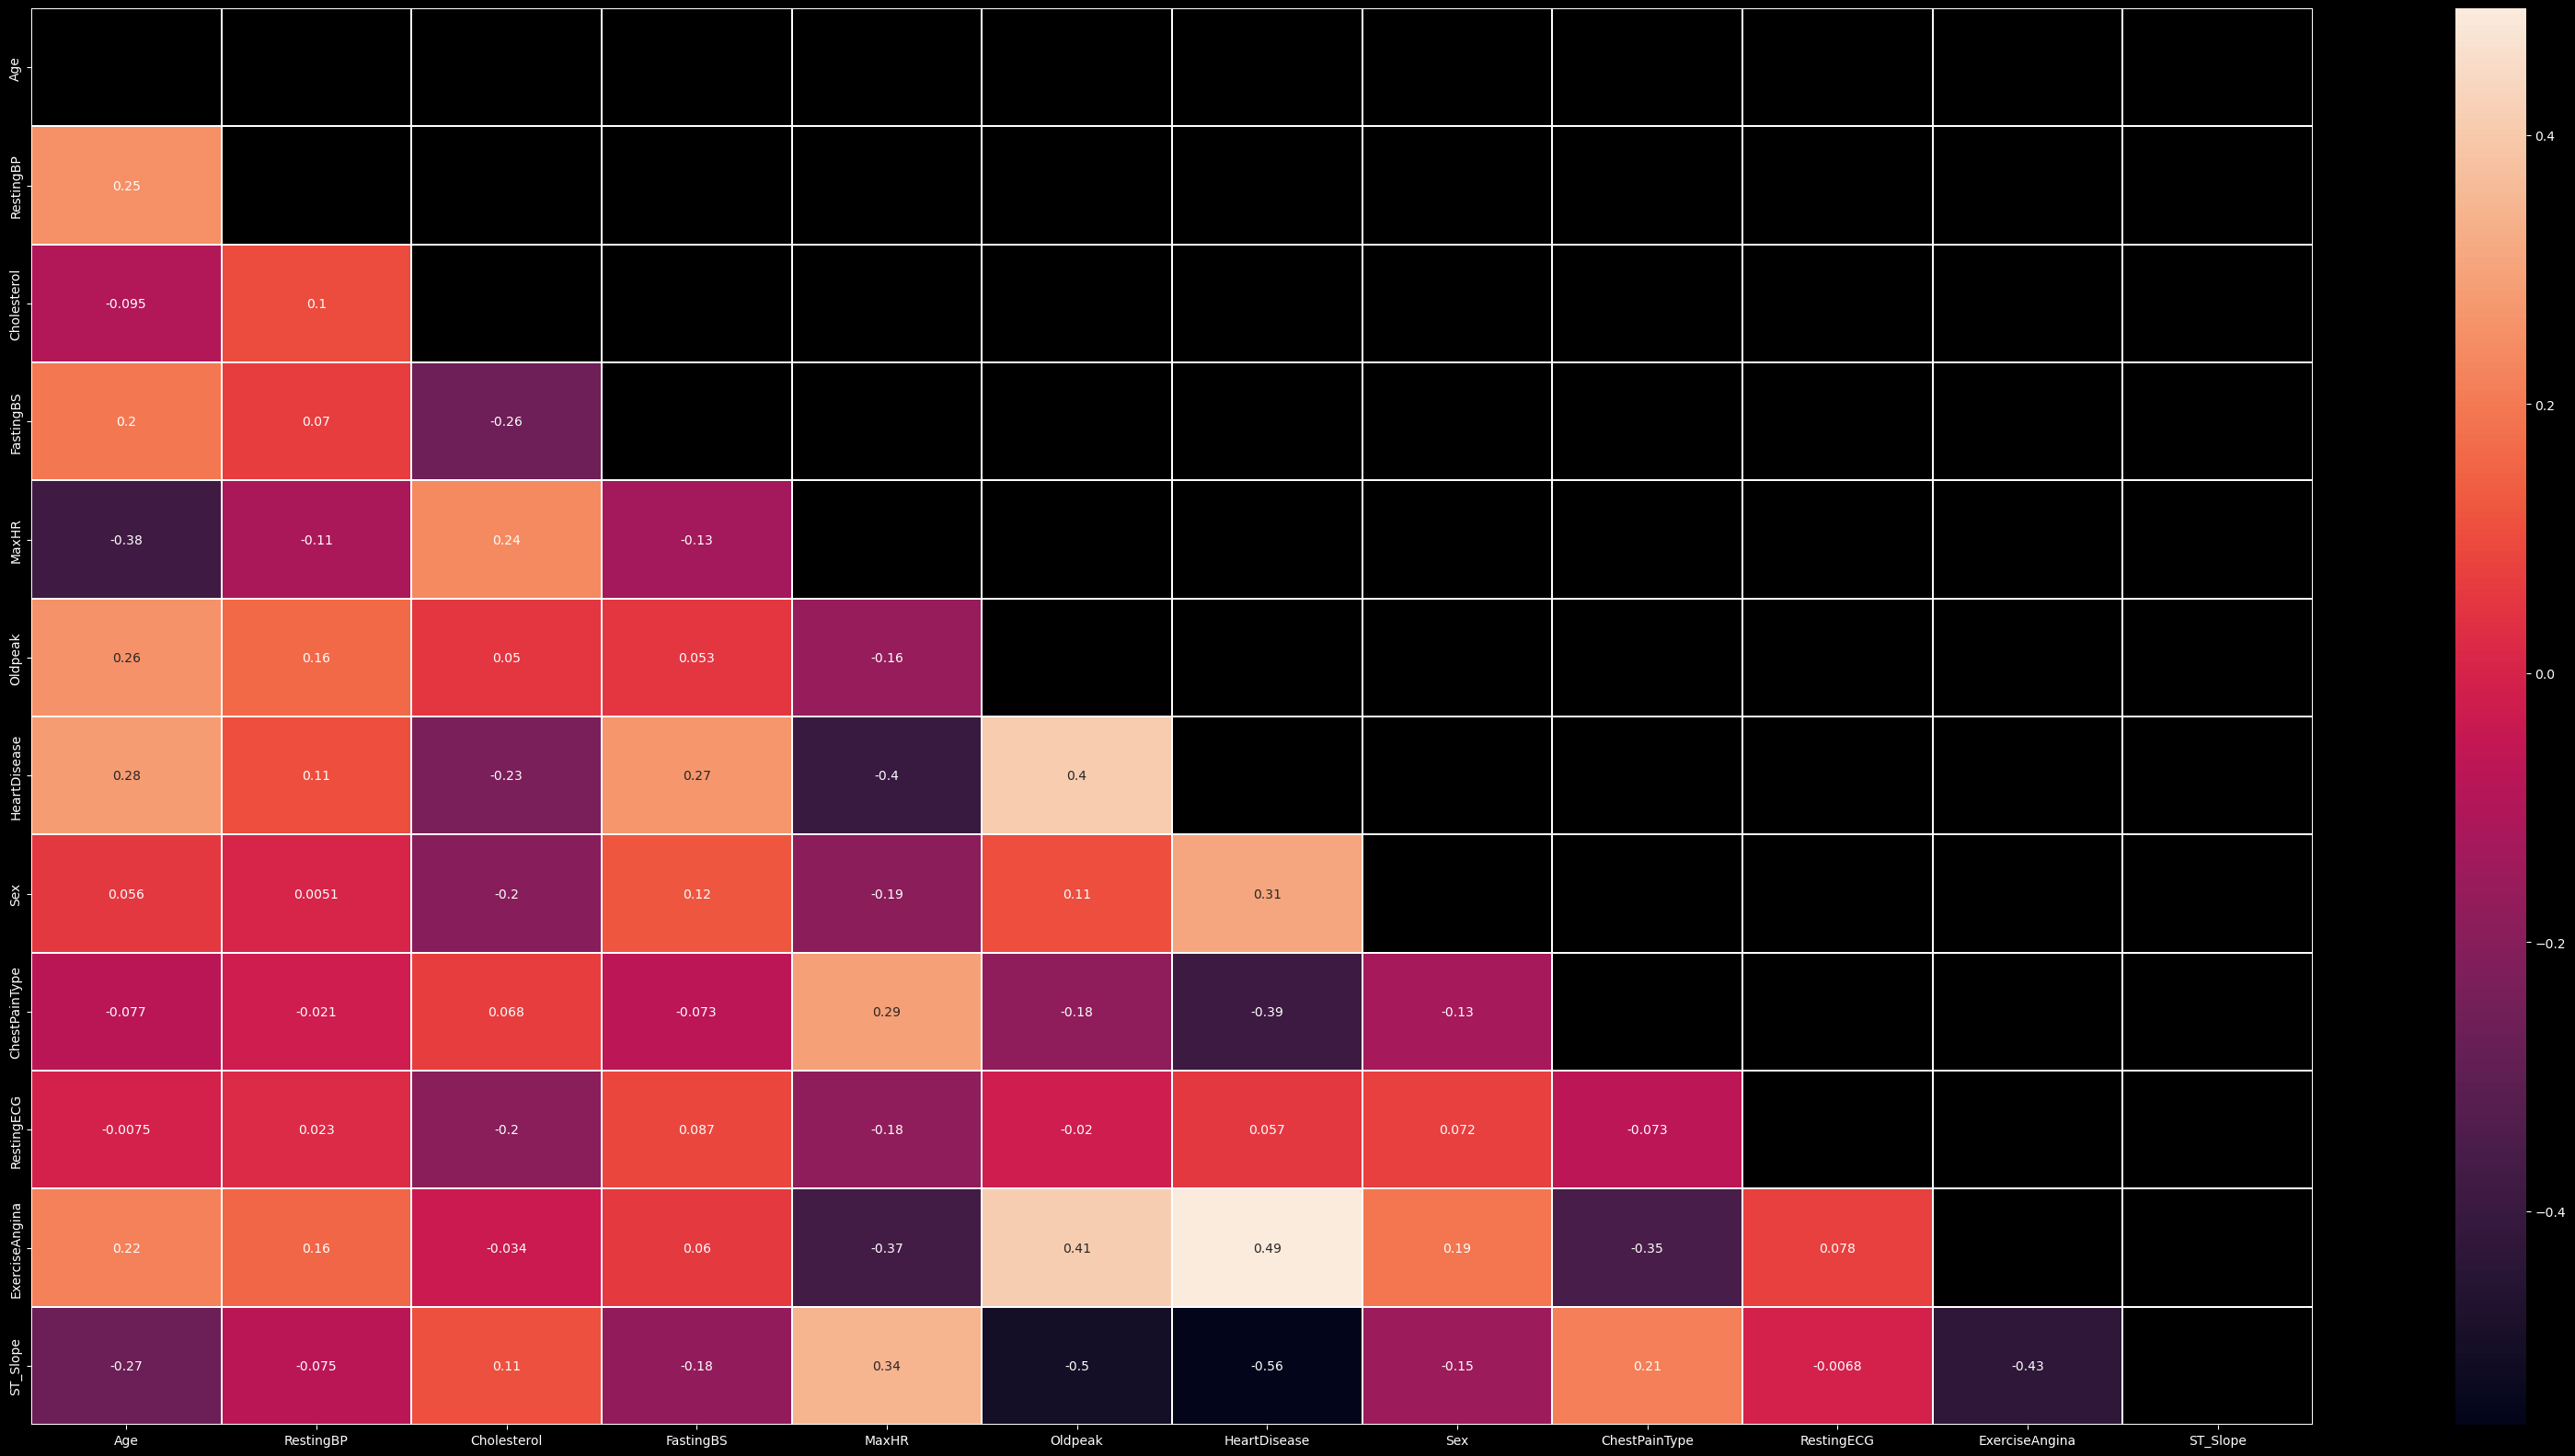

In [121]:
plt.figure(figsize=(40, 20))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.10, mask=matrix);

<Axes: ylabel='Count'>

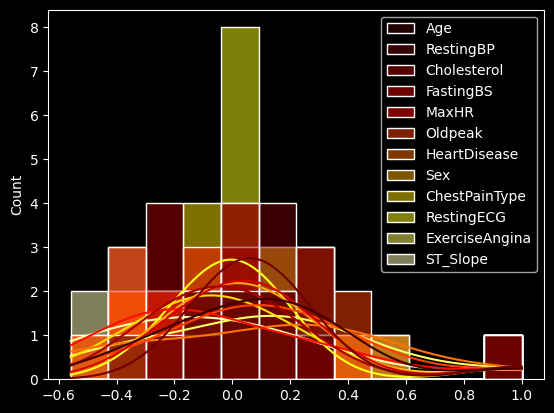

In [122]:
sns.histplot(data=data.corr(),kde=True,palette='hot')

# Splitting Data to Inputs & Outputs

In [123]:
Outputs = data['HeartDisease'].values
Outputs

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [124]:
Inputs = data.drop(['HeartDisease'],axis = 1).values
Inputs

array([[ 40., 140., 289., ...,   1.,   0.,   2.],
       [ 49., 160., 180., ...,   1.,   0.,   1.],
       [ 37., 130., 283., ...,   2.,   0.,   2.],
       ...,
       [ 57., 130., 131., ...,   1.,   1.,   1.],
       [ 57., 130., 236., ...,   0.,   0.,   1.],
       [ 38., 138., 175., ...,   1.,   0.,   2.]])

# Scaling Data

In [125]:
Scaling = StandardScaler()
Inputs[:,0:3] = Scaling.fit_transform(Inputs[:,0:3])
Inputs[:,4:5] = Scaling.fit_transform(Inputs[:,4:5])
Inputs

array([[-1.4331398 ,  0.41090889,  0.82507026, ...,  1.        ,
         0.        ,  2.        ],
       [-0.47848359,  1.49175234, -0.17196105, ...,  1.        ,
         0.        ,  1.        ],
       [-1.75135854, -0.12951283,  0.7701878 , ...,  2.        ,
         0.        ,  2.        ],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.37009972, -0.12951283,  0.34027522, ...,  0.        ,
         0.        ,  1.        ],
       [-1.64528563,  0.30282455, -0.21769643, ...,  1.        ,
         0.        ,  2.        ]])

In [126]:
columns = list(data.columns)
columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [127]:
InputsData_After_Scaling=pd.DataFrame(Inputs,columns = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
InputsData_After_Scaling

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,-1.433140,0.410909,0.825070,0.0,1.382928,0.0,1.0,1.0,1.0,0.0,2.0
1,-0.478484,1.491752,-0.171961,0.0,0.754157,1.0,0.0,2.0,1.0,0.0,1.0
2,-1.751359,-0.129513,0.770188,0.0,-1.525138,0.0,1.0,1.0,2.0,0.0,2.0
3,-0.584556,0.302825,0.139040,0.0,-1.132156,1.5,0.0,0.0,1.0,1.0,1.0
4,0.051881,0.951331,-0.034755,0.0,-0.581981,0.0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,0.0,-0.188999,1.2,1.0,3.0,1.0,0.0,1.0
914,1.536902,0.627078,-0.053049,1.0,0.164684,3.4,1.0,0.0,1.0,0.0,1.0
915,0.370100,-0.129513,-0.620168,0.0,-0.857069,1.2,1.0,0.0,1.0,1.0,1.0
916,0.370100,-0.129513,0.340275,0.0,1.461525,0.0,0.0,1.0,0.0,0.0,1.0


<Axes: >

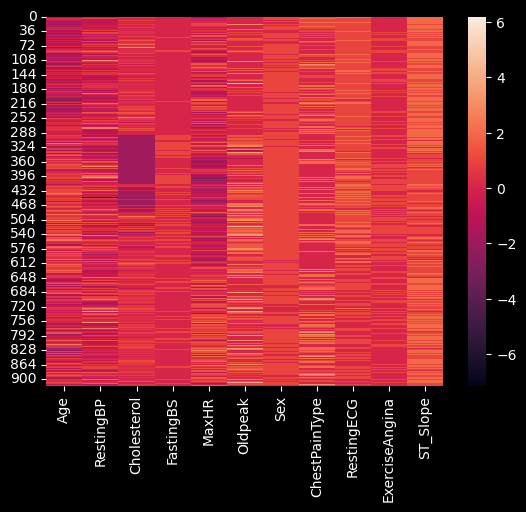

In [128]:
sns.heatmap(InputsData_After_Scaling)

# PCA

In [129]:
'''PCA = PCA()
Inputs[:,:] = PCA.fit_transform(Inputs[:,:])
Inputs'''

'PCA = PCA()\nInputs[:,:] = PCA.fit_transform(Inputs[:,:])\nInputs'

# Spliting Inputs & Outputs to training and testing model

In [130]:
Input_train , Input_test , Output_train , Output_test = train_test_split(Inputs,Outputs,test_size=0.3,random_state = 0)

# to Drow heatmap to confusion_matrix

In [131]:
def plot_confusion_matrix (Model_Prediction,title):
    cm = confusion_matrix(Output_test, Model_Prediction)
    class_names = ['possible heart Failure','Normal']
    plt.title(title)
    df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
    sns.heatmap(df_cm, annot = True)
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Logistic Regression

In [132]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(Input_train,Output_train)
Model_Prediction = LogisticRegressionModel.predict(Input_test)
Model_Prediction

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [133]:
print(classification_report(Output_test , Model_Prediction))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



<IPython.core.display.Javascript object>

Model Accuracy = 83.0 %


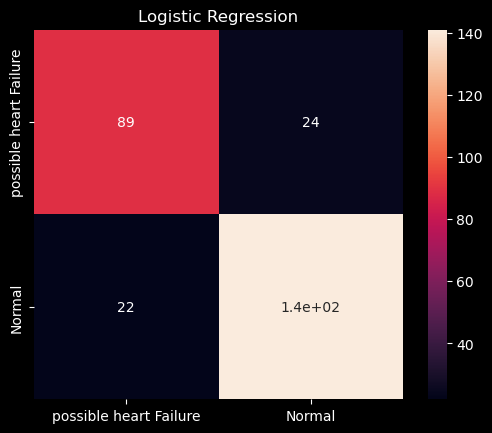

In [134]:
plot_confusion_matrix (Model_Prediction,"Logistic Regression")
# Model Accuracy
acc1 =np.round(accuracy_score(Output_test, Model_Prediction)*100)
print("Model Accuracy =",acc1,"%")

In [135]:
Data_comp = pd.DataFrame({'Actual':Output_test , 'Predict':Model_Prediction})
Data_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,0
272,1,1
273,1,1
274,1,1


<Axes: title={'center': ' Actual & Predict '}>

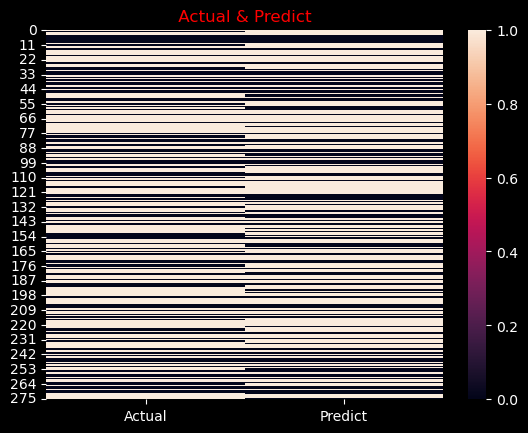

In [136]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(Data_comp)

([<matplotlib.patches.Wedge at 0x243dd07b7f0>,
 [Text(-0.5599456069679141, -0.9468162003458402, 'Accuracy'),
  Text(0.5599456512915792, 0.9468161741328933, 'Error')],
 [Text(-0.3054248765279531, -0.51644520018864, '83%'),
  Text(0.30542490070449774, 0.516445185890669, '17%')])

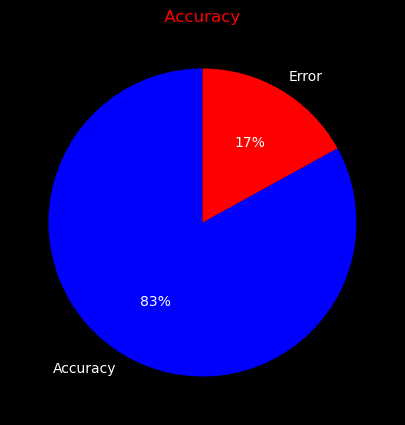

In [137]:
plt.figure(figsize=(10,5))
data = [acc1,100-acc1]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# SVC

In [138]:
SVC_Model = SVC()
SVC_Model.fit(Input_train,Output_train)
Model_Prediction_SVC = SVC_Model.predict(Input_test)
Model_Prediction_SVC

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [139]:
print(classification_report(Output_test , Model_Prediction_SVC))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       113
           1       0.89      0.91      0.90       163

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



<IPython.core.display.Javascript object>

Model Accuracy = 88.0 %


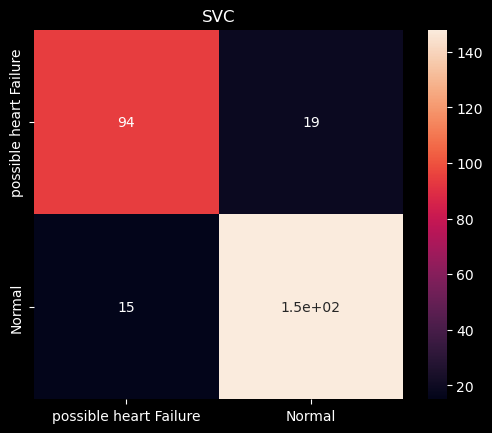

In [140]:
plot_confusion_matrix (Model_Prediction_SVC,"SVC")
# Model Accuracy
acc2 =np.round(accuracy_score(Output_test, Model_Prediction_SVC)*100)
print("Model Accuracy =",acc2,"%")

In [141]:
Data_comp = pd.DataFrame({'Actual':Output_test , 'Predict':Model_Prediction_SVC})
Data_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


<Axes: title={'center': ' Actual & Predict '}>

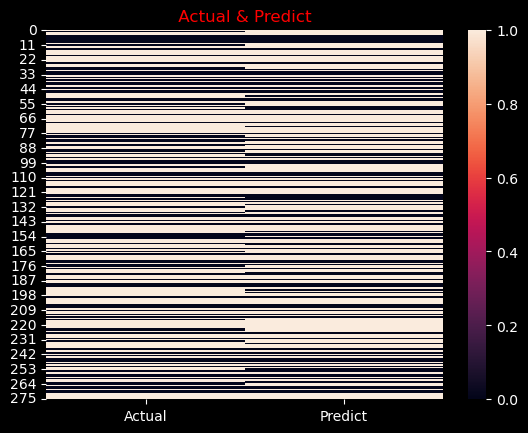

In [142]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(Data_comp)

([<matplotlib.patches.Wedge at 0x243dce9ec50>,
 [Text(-0.40493702327429076, -1.022754128411006, 'Accuracy'),
  Text(0.40493704721357865, 1.0227541189327707, 'Error')],
 [Text(-0.22087473996779494, -0.557865888224185, '88%'),
  Text(0.22087475302558832, 0.5578658830542386, '12%')])

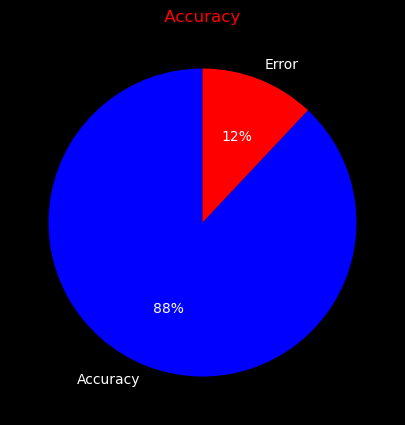

In [143]:
plt.figure(figsize=(10,5))
data = [acc2,100-acc2]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# Random Forest

In [144]:
RandomForestClassifier_Model = RandomForestClassifier()
RandomForestClassifier_Model.fit(Input_train,Output_train)
Model_Prediction_RFC = RandomForestClassifier_Model.predict(Input_test)
Model_Prediction_RFC

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [145]:
print(classification_report(Output_test , Model_Prediction_RFC))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       113
           1       0.88      0.89      0.89       163

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



<IPython.core.display.Javascript object>

Model Accuracy = 87.0 %


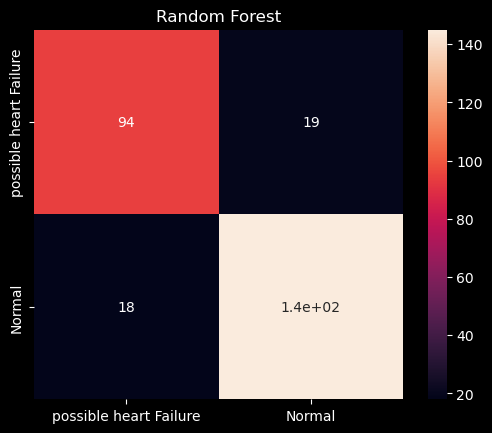

In [146]:
plot_confusion_matrix (Model_Prediction_RFC,"Random Forest")

# Model Accuracy
acc3 =np.round(accuracy_score(Output_test, Model_Prediction_RFC)*100)
print("Model Accuracy =",acc3,"%")

In [147]:
Data_comp = pd.DataFrame({'Actual':Output_test , 'Predict':Model_Prediction_RFC})
Data_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


<Axes: title={'center': ' Actual & Predict '}>

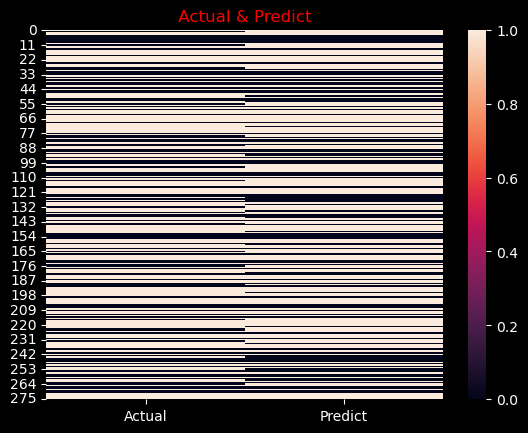

In [148]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(Data_comp)

([<matplotlib.patches.Wedge at 0x243de401a20>,
 [Text(-0.4368626645752139, -1.0095300947967052, 'Accuracy'),
  Text(0.436862664575214, 1.009530094796705, 'Error')],
 [Text(-0.23828872613193483, -0.550652778980021, '87%'),
  Text(0.23828872613193489, 0.5506527789800209, '13%')])

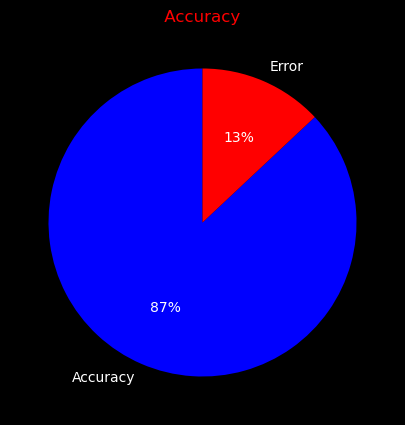

In [149]:
plt.figure(figsize=(10,5))
data = [acc3,100-acc3]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# Gradient Boosting Classifier

In [150]:
GradientBoosting_Model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GradientBoosting_Model.fit(Input_train,Output_train)
Model_Prediction_GBC = GradientBoosting_Model.predict(Input_test)
print(Model_Prediction_GBC)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [151]:
print(classification_report(Output_test , Model_Prediction_GBC))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       113
           1       0.87      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



<IPython.core.display.Javascript object>

Model Accuracy = 86.0 %


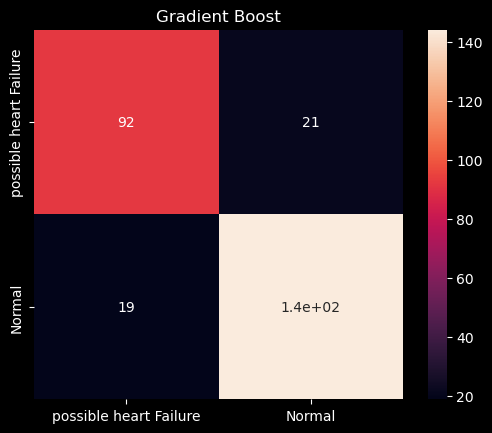

In [152]:
plot_confusion_matrix (Model_Prediction_GBC,"Gradient Boost")

# Model Accuracy
acc4 =np.round(accuracy_score(Output_test, Model_Prediction_GBC)*100)
print("Model Accuracy =",acc4,"%")

In [153]:
Data_comp = pd.DataFrame({'Actual':Output_test , 'Predict':Model_Prediction_GBC})
Data_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


<Axes: title={'center': ' Actual & Predict '}>

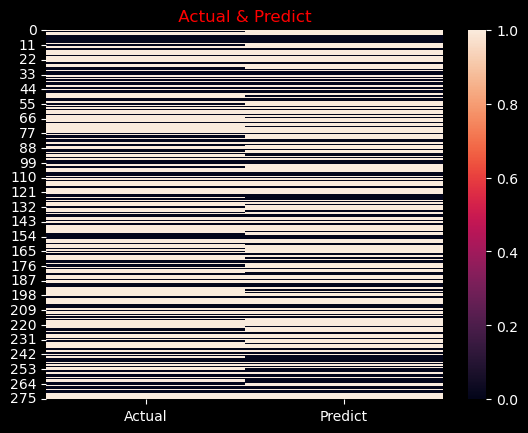

In [154]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(Data_comp)

([<matplotlib.patches.Wedge at 0x243de8b4d60>,
 [Text(-0.4683571759915193, -0.9953097787609891, 'Accuracy'),
  Text(0.46835712939770596, 0.9953098006863695, 'Error')],
 [Text(-0.2554675505408287, -0.5428962429605395, '86%'),
  Text(0.2554675251260214, 0.5428962549198378, '14%')])

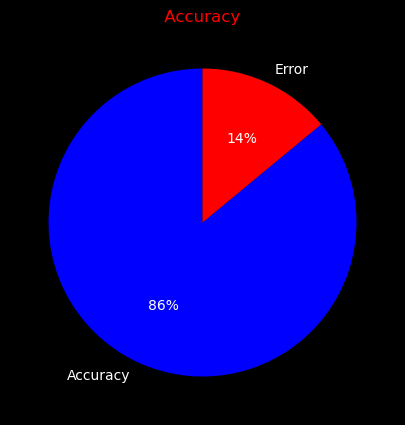

In [155]:
plt.figure(figsize=(10,5))
data = [acc4,100-acc4]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# XGBoost Classifier

In [156]:
XGBoost_Model = XGBClassifier()
XGBoost_Model.fit(Input_train,Output_train)
Model_Prediction_XGBoost = XGBoost_Model.predict(Input_test)
print(Model_Prediction_XGBoost)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1]


In [157]:
print(classification_report(Output_test , Model_Prediction_XGBoost))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       113
           1       0.88      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



<IPython.core.display.Javascript object>

Model Accuracy = 86.0 %


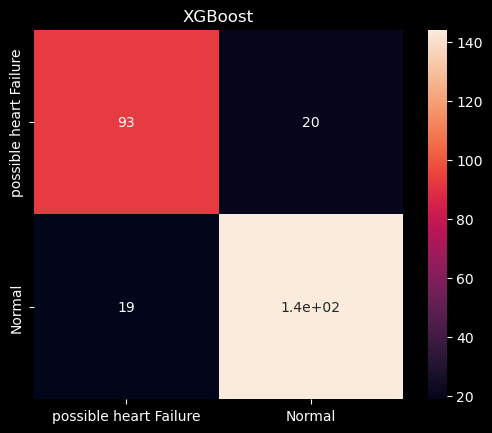

In [158]:
plot_confusion_matrix (Model_Prediction_XGBoost,"XGBoost")

# Model Accuracy
acc5 =np.round(accuracy_score(Output_test, Model_Prediction_XGBoost)*100)
print("Model Accuracy =",acc5,"%")

In [159]:
Data_comp = pd.DataFrame({'Actual':Output_test , 'Predict':Model_Prediction_XGBoost})
Data_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


<Axes: title={'center': ' Actual & Predict '}>

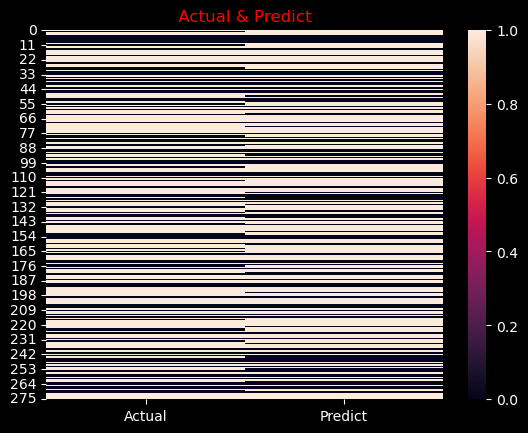

In [160]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(Data_comp)

([<matplotlib.patches.Wedge at 0x243deadadd0>,
 [Text(-0.4683571759915193, -0.9953097787609891, 'Accuracy'),
  Text(0.46835712939770596, 0.9953098006863695, 'Error')],
 [Text(-0.2554675505408287, -0.5428962429605395, '86%'),
  Text(0.2554675251260214, 0.5428962549198378, '14%')])

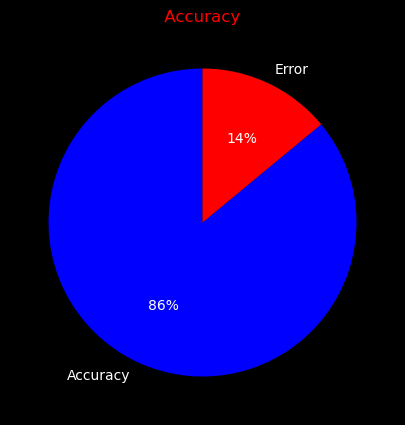

In [161]:
plt.figure(figsize=(10,5))
data = [acc5,100-acc5]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# Ada Boost Classifier

In [162]:
AdaBoostClassifier_Model = AdaBoostClassifier()
AdaBoostClassifier_Model.fit(Input_train,Output_train)
Model_Prediction_AdaBoost = AdaBoostClassifier_Model.predict(Input_test)
print(Model_Prediction_AdaBoost)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1
 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [163]:
print(classification_report(Output_test , Model_Prediction_AdaBoost))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       113
           1       0.87      0.88      0.87       163

    accuracy                           0.85       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



<IPython.core.display.Javascript object>

Model Accuracy = 85.0 %


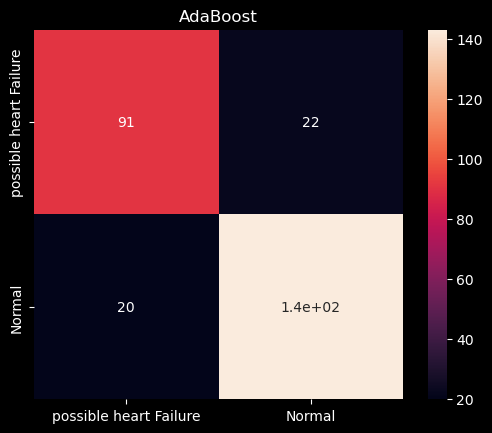

In [164]:
plot_confusion_matrix (Model_Prediction_AdaBoost,"AdaBoost")

# Model Accuracy
acc6 =np.round(accuracy_score(Output_test, Model_Prediction_AdaBoost)*100)
print("Model Accuracy =",acc6,"%")

In [165]:
Data_comp = pd.DataFrame({'Actual':Output_test , 'Predict':Model_Prediction_AdaBoost})
Data_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


<Axes: title={'center': ' Actual & Predict '}>

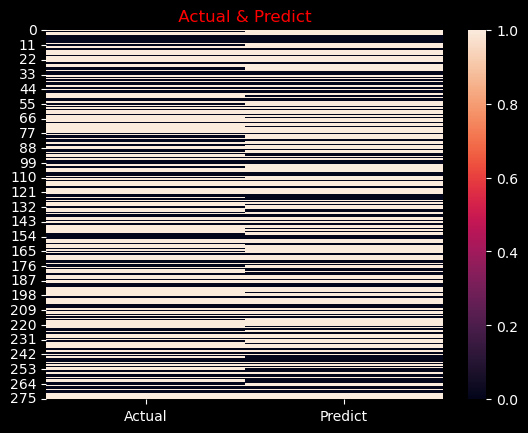

In [166]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(Data_comp)

([<matplotlib.patches.Wedge at 0x243de9f6f20>,
 [Text(-0.49938947630209474, -0.9801072140121813, 'Accuracy'),
  Text(0.49938938453783266, 0.980107260768394, 'Error')],
 [Text(-0.27239425980114257, -0.5346039349157352, '85%'),
  Text(0.2723942097479087, 0.534603960419124, '15%')])

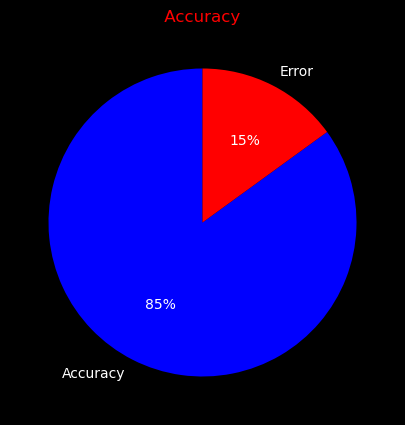

In [167]:
plt.figure(figsize=(10,5))
data = [acc6,100-acc6]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# CatBoost Classifier

In [168]:
CatBoostClassifier_Model = CatBoostClassifier()
CatBoostClassifier_Model.fit(Input_train,Output_train)
Model_Prediction_CatBoost = CatBoostClassifier_Model.predict(Input_test)
print(Model_Prediction_CatBoost)

Learning rate set to 0.008526
0:	learn: 0.6858117	total: 6.12ms	remaining: 6.11s
1:	learn: 0.6783857	total: 11.1ms	remaining: 5.53s
2:	learn: 0.6715859	total: 16.1ms	remaining: 5.35s
3:	learn: 0.6644218	total: 21.2ms	remaining: 5.28s
4:	learn: 0.6568267	total: 26.3ms	remaining: 5.23s
5:	learn: 0.6499199	total: 31ms	remaining: 5.14s
6:	learn: 0.6429184	total: 35.9ms	remaining: 5.1s
7:	learn: 0.6365906	total: 40.9ms	remaining: 5.07s
8:	learn: 0.6301238	total: 44.6ms	remaining: 4.92s
9:	learn: 0.6237097	total: 49.8ms	remaining: 4.93s
10:	learn: 0.6172799	total: 54.5ms	remaining: 4.9s
11:	learn: 0.6108613	total: 59ms	remaining: 4.86s
12:	learn: 0.6058590	total: 63.7ms	remaining: 4.83s
13:	learn: 0.6010082	total: 68.4ms	remaining: 4.81s
14:	learn: 0.5951537	total: 73ms	remaining: 4.79s
15:	learn: 0.5892880	total: 77.5ms	remaining: 4.76s
16:	learn: 0.5837553	total: 82.2ms	remaining: 4.75s
17:	learn: 0.5778052	total: 86.8ms	remaining: 4.74s
18:	learn: 0.5728586	total: 91.4ms	remaining: 4.72s


166:	learn: 0.2850598	total: 787ms	remaining: 3.92s
167:	learn: 0.2843274	total: 792ms	remaining: 3.92s
168:	learn: 0.2837657	total: 797ms	remaining: 3.92s
169:	learn: 0.2830741	total: 802ms	remaining: 3.91s
170:	learn: 0.2825140	total: 806ms	remaining: 3.91s
171:	learn: 0.2817531	total: 811ms	remaining: 3.9s
172:	learn: 0.2811070	total: 815ms	remaining: 3.9s
173:	learn: 0.2803232	total: 820ms	remaining: 3.89s
174:	learn: 0.2796085	total: 824ms	remaining: 3.88s
175:	learn: 0.2790405	total: 828ms	remaining: 3.88s
176:	learn: 0.2785384	total: 832ms	remaining: 3.87s
177:	learn: 0.2780068	total: 837ms	remaining: 3.87s
178:	learn: 0.2773307	total: 841ms	remaining: 3.86s
179:	learn: 0.2771185	total: 846ms	remaining: 3.85s
180:	learn: 0.2764178	total: 850ms	remaining: 3.85s
181:	learn: 0.2758991	total: 855ms	remaining: 3.84s
182:	learn: 0.2753711	total: 859ms	remaining: 3.84s
183:	learn: 0.2747529	total: 864ms	remaining: 3.83s
184:	learn: 0.2737272	total: 868ms	remaining: 3.82s
185:	learn: 0.

338:	learn: 0.2147297	total: 1.57s	remaining: 3.06s
339:	learn: 0.2144320	total: 1.57s	remaining: 3.05s
340:	learn: 0.2141811	total: 1.58s	remaining: 3.05s
341:	learn: 0.2137623	total: 1.58s	remaining: 3.05s
342:	learn: 0.2135375	total: 1.59s	remaining: 3.04s
343:	learn: 0.2131606	total: 1.59s	remaining: 3.04s
344:	learn: 0.2128145	total: 1.6s	remaining: 3.03s
345:	learn: 0.2125241	total: 1.6s	remaining: 3.03s
346:	learn: 0.2123057	total: 1.61s	remaining: 3.02s
347:	learn: 0.2121575	total: 1.61s	remaining: 3.02s
348:	learn: 0.2118382	total: 1.62s	remaining: 3.01s
349:	learn: 0.2116794	total: 1.62s	remaining: 3.01s
350:	learn: 0.2115785	total: 1.63s	remaining: 3s
351:	learn: 0.2114242	total: 1.63s	remaining: 3s
352:	learn: 0.2111262	total: 1.63s	remaining: 3s
353:	learn: 0.2109102	total: 1.64s	remaining: 2.99s
354:	learn: 0.2107586	total: 1.64s	remaining: 2.99s
355:	learn: 0.2104630	total: 1.65s	remaining: 2.98s
356:	learn: 0.2102152	total: 1.65s	remaining: 2.98s
357:	learn: 0.2100824	t

509:	learn: 0.1782775	total: 2.35s	remaining: 2.26s
510:	learn: 0.1779633	total: 2.36s	remaining: 2.26s
511:	learn: 0.1775553	total: 2.37s	remaining: 2.25s
512:	learn: 0.1772994	total: 2.37s	remaining: 2.25s
513:	learn: 0.1770473	total: 2.38s	remaining: 2.25s
514:	learn: 0.1769077	total: 2.38s	remaining: 2.24s
515:	learn: 0.1767492	total: 2.38s	remaining: 2.24s
516:	learn: 0.1766836	total: 2.39s	remaining: 2.23s
517:	learn: 0.1765423	total: 2.39s	remaining: 2.23s
518:	learn: 0.1762336	total: 2.4s	remaining: 2.22s
519:	learn: 0.1761160	total: 2.4s	remaining: 2.22s
520:	learn: 0.1760539	total: 2.41s	remaining: 2.21s
521:	learn: 0.1757797	total: 2.41s	remaining: 2.21s
522:	learn: 0.1756605	total: 2.42s	remaining: 2.2s
523:	learn: 0.1754684	total: 2.42s	remaining: 2.2s
524:	learn: 0.1753352	total: 2.42s	remaining: 2.19s
525:	learn: 0.1752344	total: 2.43s	remaining: 2.19s
526:	learn: 0.1749924	total: 2.43s	remaining: 2.18s
527:	learn: 0.1748323	total: 2.44s	remaining: 2.18s
528:	learn: 0.17

681:	learn: 0.1521444	total: 3.14s	remaining: 1.46s
682:	learn: 0.1519397	total: 3.14s	remaining: 1.46s
683:	learn: 0.1518417	total: 3.15s	remaining: 1.45s
684:	learn: 0.1516731	total: 3.15s	remaining: 1.45s
685:	learn: 0.1515717	total: 3.16s	remaining: 1.44s
686:	learn: 0.1514359	total: 3.16s	remaining: 1.44s
687:	learn: 0.1513319	total: 3.17s	remaining: 1.44s
688:	learn: 0.1512577	total: 3.17s	remaining: 1.43s
689:	learn: 0.1511366	total: 3.17s	remaining: 1.43s
690:	learn: 0.1510465	total: 3.18s	remaining: 1.42s
691:	learn: 0.1507605	total: 3.18s	remaining: 1.42s
692:	learn: 0.1506653	total: 3.19s	remaining: 1.41s
693:	learn: 0.1505488	total: 3.19s	remaining: 1.41s
694:	learn: 0.1504458	total: 3.2s	remaining: 1.4s
695:	learn: 0.1502710	total: 3.2s	remaining: 1.4s
696:	learn: 0.1500755	total: 3.2s	remaining: 1.39s
697:	learn: 0.1497970	total: 3.21s	remaining: 1.39s
698:	learn: 0.1495943	total: 3.21s	remaining: 1.38s
699:	learn: 0.1494101	total: 3.22s	remaining: 1.38s
700:	learn: 0.149

863:	learn: 0.1283446	total: 3.94s	remaining: 621ms
864:	learn: 0.1281227	total: 3.95s	remaining: 616ms
865:	learn: 0.1280184	total: 3.95s	remaining: 612ms
866:	learn: 0.1279701	total: 3.96s	remaining: 607ms
867:	learn: 0.1278147	total: 3.96s	remaining: 602ms
868:	learn: 0.1277294	total: 3.96s	remaining: 598ms
869:	learn: 0.1276505	total: 3.97s	remaining: 593ms
870:	learn: 0.1274660	total: 3.97s	remaining: 589ms
871:	learn: 0.1274532	total: 3.98s	remaining: 584ms
872:	learn: 0.1273580	total: 3.98s	remaining: 579ms
873:	learn: 0.1273424	total: 3.98s	remaining: 575ms
874:	learn: 0.1271770	total: 3.99s	remaining: 570ms
875:	learn: 0.1271106	total: 3.99s	remaining: 565ms
876:	learn: 0.1270931	total: 4s	remaining: 561ms
877:	learn: 0.1269582	total: 4s	remaining: 556ms
878:	learn: 0.1269450	total: 4.01s	remaining: 552ms
879:	learn: 0.1267449	total: 4.01s	remaining: 547ms
880:	learn: 0.1266455	total: 4.01s	remaining: 542ms
881:	learn: 0.1266186	total: 4.02s	remaining: 538ms
882:	learn: 0.1265

In [169]:
print(classification_report(Output_test , Model_Prediction_CatBoost))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       113
           1       0.89      0.88      0.89       163

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



<IPython.core.display.Javascript object>

Model Accuracy = 87.0 %


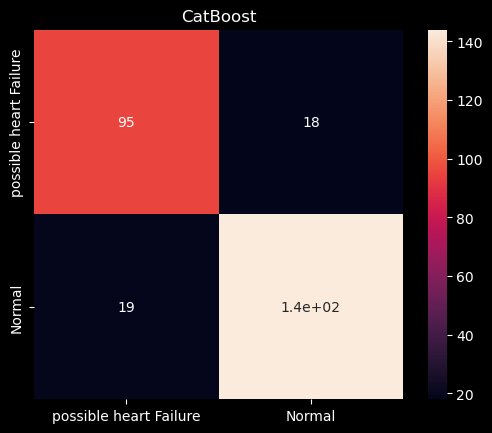

In [170]:
plot_confusion_matrix (Model_Prediction_CatBoost,"CatBoost")

# Model Accuracy
acc7 =np.round(accuracy_score(Output_test, Model_Prediction_CatBoost)*100)
print("Model Accuracy =",acc7,"%")

In [171]:
Data_comp = pd.DataFrame({'Actual':Output_test , 'Predict':Model_Prediction_CatBoost})
Data_comp

,Actual,Predict
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,1,1
273,1,1
274,1,1


<Axes: title={'center': ' Actual & Predict '}>

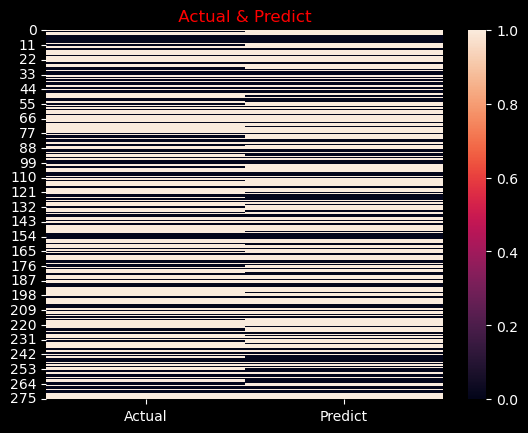

In [172]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(Data_comp)

([<matplotlib.patches.Wedge at 0x243ded42080>,
 [Text(-0.4368626645752139, -1.0095300947967052, 'Accuracy'),
  Text(0.436862664575214, 1.009530094796705, 'Error')],
 [Text(-0.23828872613193483, -0.550652778980021, '87%'),
  Text(0.23828872613193489, 0.5506527789800209, '13%')])

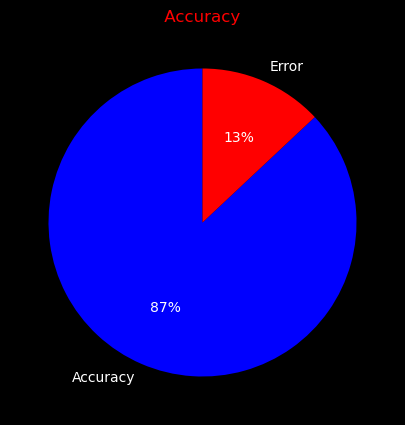

In [173]:
plt.figure(figsize=(10,5))
data = [acc7,100-acc7]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

In [174]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    return train_acc, test_acc, y_pred

# Assuming you have Input_train, Output_train, Input_test, Output_test defined

models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    CatBoostClassifier()
]

model_names = ["Logistic Regression", "SVC", "Random Forest", "AdaBoost", "XGBoost", "Gradient Boosting", "CatBoost"]
train_results = []
test_results = []

for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, Input_train, Output_train, Input_test, Output_test)
    train_results.append(train_acc)
    test_results.append(test_acc)

Learning rate set to 0.008526
0:	learn: 0.6858117	total: 5.79ms	remaining: 5.78s
1:	learn: 0.6783857	total: 10.3ms	remaining: 5.12s
2:	learn: 0.6715859	total: 14.8ms	remaining: 4.91s
3:	learn: 0.6644218	total: 19.8ms	remaining: 4.94s
4:	learn: 0.6568267	total: 24.2ms	remaining: 4.81s
5:	learn: 0.6499199	total: 29ms	remaining: 4.81s
6:	learn: 0.6429184	total: 34ms	remaining: 4.82s
7:	learn: 0.6365906	total: 38.9ms	remaining: 4.83s
8:	learn: 0.6301238	total: 41.7ms	remaining: 4.59s
9:	learn: 0.6237097	total: 46.9ms	remaining: 4.64s
10:	learn: 0.6172799	total: 51.7ms	remaining: 4.65s
11:	learn: 0.6108613	total: 55.4ms	remaining: 4.56s
12:	learn: 0.6058590	total: 60.4ms	remaining: 4.58s
13:	learn: 0.6010082	total: 65.2ms	remaining: 4.59s
14:	learn: 0.5951537	total: 70ms	remaining: 4.6s
15:	learn: 0.5892880	total: 74.4ms	remaining: 4.57s
16:	learn: 0.5837553	total: 78.9ms	remaining: 4.56s
17:	learn: 0.5778052	total: 83.4ms	remaining: 4.55s
18:	learn: 0.5728586	total: 87.9ms	remaining: 4.54s

171:	learn: 0.2817531	total: 795ms	remaining: 3.83s
172:	learn: 0.2811070	total: 800ms	remaining: 3.83s
173:	learn: 0.2803232	total: 805ms	remaining: 3.82s
174:	learn: 0.2796085	total: 810ms	remaining: 3.82s
175:	learn: 0.2790405	total: 814ms	remaining: 3.81s
176:	learn: 0.2785384	total: 818ms	remaining: 3.8s
177:	learn: 0.2780068	total: 823ms	remaining: 3.8s
178:	learn: 0.2773307	total: 827ms	remaining: 3.79s
179:	learn: 0.2771185	total: 832ms	remaining: 3.79s
180:	learn: 0.2764178	total: 837ms	remaining: 3.79s
181:	learn: 0.2758991	total: 841ms	remaining: 3.78s
182:	learn: 0.2753711	total: 845ms	remaining: 3.77s
183:	learn: 0.2747529	total: 850ms	remaining: 3.77s
184:	learn: 0.2737272	total: 854ms	remaining: 3.76s
185:	learn: 0.2733122	total: 860ms	remaining: 3.76s
186:	learn: 0.2728739	total: 864ms	remaining: 3.75s
187:	learn: 0.2725088	total: 868ms	remaining: 3.75s
188:	learn: 0.2719775	total: 873ms	remaining: 3.75s
189:	learn: 0.2713717	total: 877ms	remaining: 3.74s
190:	learn: 0.

342:	learn: 0.2135375	total: 1.59s	remaining: 3.05s
343:	learn: 0.2131606	total: 1.6s	remaining: 3.05s
344:	learn: 0.2128145	total: 1.6s	remaining: 3.05s
345:	learn: 0.2125241	total: 1.61s	remaining: 3.04s
346:	learn: 0.2123057	total: 1.61s	remaining: 3.04s
347:	learn: 0.2121575	total: 1.62s	remaining: 3.03s
348:	learn: 0.2118382	total: 1.62s	remaining: 3.03s
349:	learn: 0.2116794	total: 1.63s	remaining: 3.02s
350:	learn: 0.2115785	total: 1.63s	remaining: 3.02s
351:	learn: 0.2114242	total: 1.64s	remaining: 3.01s
352:	learn: 0.2111262	total: 1.64s	remaining: 3.01s
353:	learn: 0.2109102	total: 1.65s	remaining: 3s
354:	learn: 0.2107586	total: 1.65s	remaining: 3s
355:	learn: 0.2104630	total: 1.66s	remaining: 3s
356:	learn: 0.2102152	total: 1.66s	remaining: 2.99s
357:	learn: 0.2100824	total: 1.67s	remaining: 2.99s
358:	learn: 0.2097617	total: 1.67s	remaining: 2.98s
359:	learn: 0.2095654	total: 1.67s	remaining: 2.98s
360:	learn: 0.2091887	total: 1.68s	remaining: 2.97s
361:	learn: 0.2089450	t

514:	learn: 0.1769077	total: 2.4s	remaining: 2.26s
515:	learn: 0.1767492	total: 2.4s	remaining: 2.25s
516:	learn: 0.1766836	total: 2.41s	remaining: 2.25s
517:	learn: 0.1765423	total: 2.41s	remaining: 2.25s
518:	learn: 0.1762336	total: 2.42s	remaining: 2.24s
519:	learn: 0.1761160	total: 2.42s	remaining: 2.24s
520:	learn: 0.1760539	total: 2.43s	remaining: 2.23s
521:	learn: 0.1757797	total: 2.43s	remaining: 2.23s
522:	learn: 0.1756605	total: 2.44s	remaining: 2.22s
523:	learn: 0.1754684	total: 2.44s	remaining: 2.22s
524:	learn: 0.1753352	total: 2.44s	remaining: 2.21s
525:	learn: 0.1752344	total: 2.45s	remaining: 2.21s
526:	learn: 0.1749924	total: 2.45s	remaining: 2.2s
527:	learn: 0.1748323	total: 2.46s	remaining: 2.2s
528:	learn: 0.1747112	total: 2.46s	remaining: 2.19s
529:	learn: 0.1746511	total: 2.47s	remaining: 2.19s
530:	learn: 0.1744141	total: 2.47s	remaining: 2.18s
531:	learn: 0.1742171	total: 2.48s	remaining: 2.18s
532:	learn: 0.1739488	total: 2.48s	remaining: 2.17s
533:	learn: 0.17

688:	learn: 0.1512577	total: 3.21s	remaining: 1.45s
689:	learn: 0.1511366	total: 3.21s	remaining: 1.44s
690:	learn: 0.1510465	total: 3.22s	remaining: 1.44s
691:	learn: 0.1507605	total: 3.22s	remaining: 1.43s
692:	learn: 0.1506653	total: 3.23s	remaining: 1.43s
693:	learn: 0.1505488	total: 3.23s	remaining: 1.43s
694:	learn: 0.1504458	total: 3.24s	remaining: 1.42s
695:	learn: 0.1502710	total: 3.24s	remaining: 1.42s
696:	learn: 0.1500755	total: 3.25s	remaining: 1.41s
697:	learn: 0.1497970	total: 3.25s	remaining: 1.41s
698:	learn: 0.1495943	total: 3.25s	remaining: 1.4s
699:	learn: 0.1494101	total: 3.26s	remaining: 1.4s
700:	learn: 0.1493999	total: 3.26s	remaining: 1.39s
701:	learn: 0.1490702	total: 3.27s	remaining: 1.39s
702:	learn: 0.1488214	total: 3.27s	remaining: 1.38s
703:	learn: 0.1486205	total: 3.28s	remaining: 1.38s
704:	learn: 0.1485272	total: 3.28s	remaining: 1.37s
705:	learn: 0.1483888	total: 3.29s	remaining: 1.37s
706:	learn: 0.1482900	total: 3.29s	remaining: 1.36s
707:	learn: 0.

856:	learn: 0.1291866	total: 4.01s	remaining: 669ms
857:	learn: 0.1290810	total: 4.01s	remaining: 664ms
858:	learn: 0.1289545	total: 4.02s	remaining: 660ms
859:	learn: 0.1287806	total: 4.02s	remaining: 655ms
860:	learn: 0.1286630	total: 4.03s	remaining: 650ms
861:	learn: 0.1285161	total: 4.03s	remaining: 646ms
862:	learn: 0.1284503	total: 4.04s	remaining: 641ms
863:	learn: 0.1283446	total: 4.04s	remaining: 637ms
864:	learn: 0.1281227	total: 4.05s	remaining: 632ms
865:	learn: 0.1280184	total: 4.05s	remaining: 627ms
866:	learn: 0.1279701	total: 4.06s	remaining: 623ms
867:	learn: 0.1278147	total: 4.06s	remaining: 618ms
868:	learn: 0.1277294	total: 4.07s	remaining: 613ms
869:	learn: 0.1276505	total: 4.07s	remaining: 609ms
870:	learn: 0.1274660	total: 4.08s	remaining: 604ms
871:	learn: 0.1274532	total: 4.08s	remaining: 599ms
872:	learn: 0.1273580	total: 4.09s	remaining: 595ms
873:	learn: 0.1273424	total: 4.09s	remaining: 590ms
874:	learn: 0.1271770	total: 4.1s	remaining: 585ms
875:	learn: 0

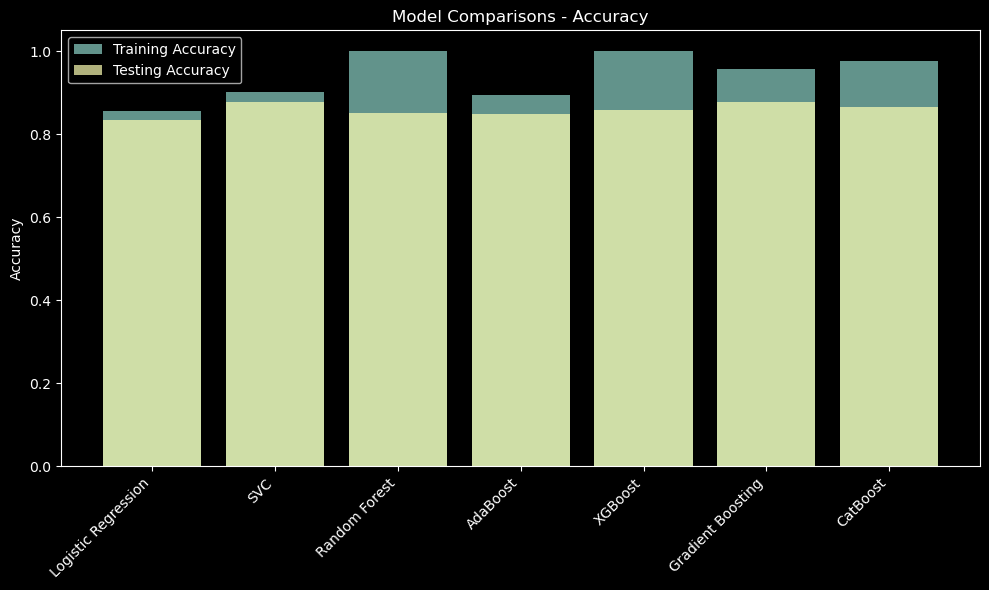

In [175]:
# Plot model performance
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_results, alpha=0.7, label="Training Accuracy")
plt.bar(model_names, test_results, alpha=0.7, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.tight_layout()
plt.show()

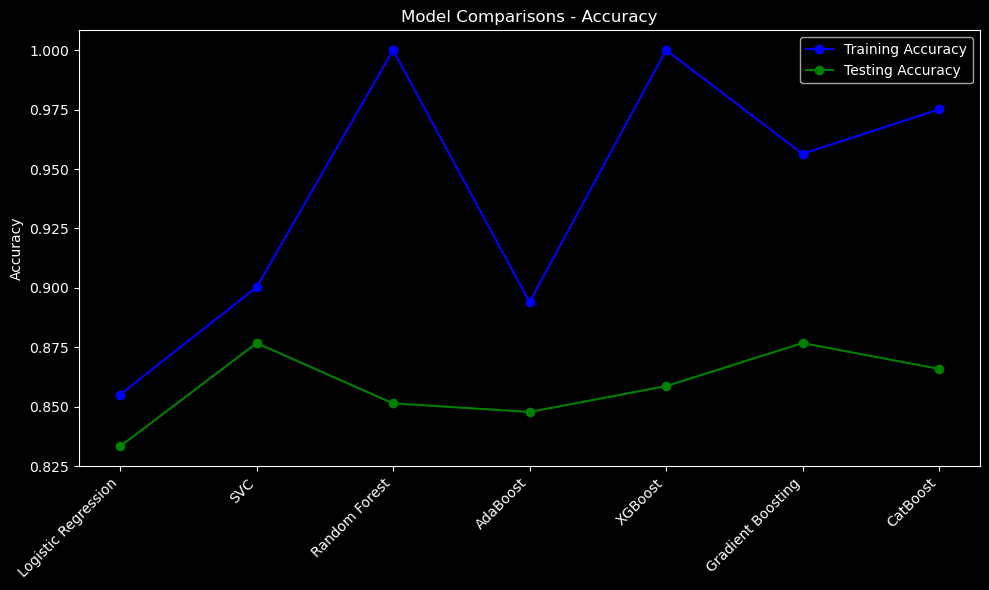

In [176]:
# Plot model performance
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_results, marker='o', label="Training Accuracy", linestyle='-', color='b')
plt.plot(model_names, test_results, marker='o', label="Testing Accuracy", linestyle='-', color='g')
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.tight_layout()
plt.show()


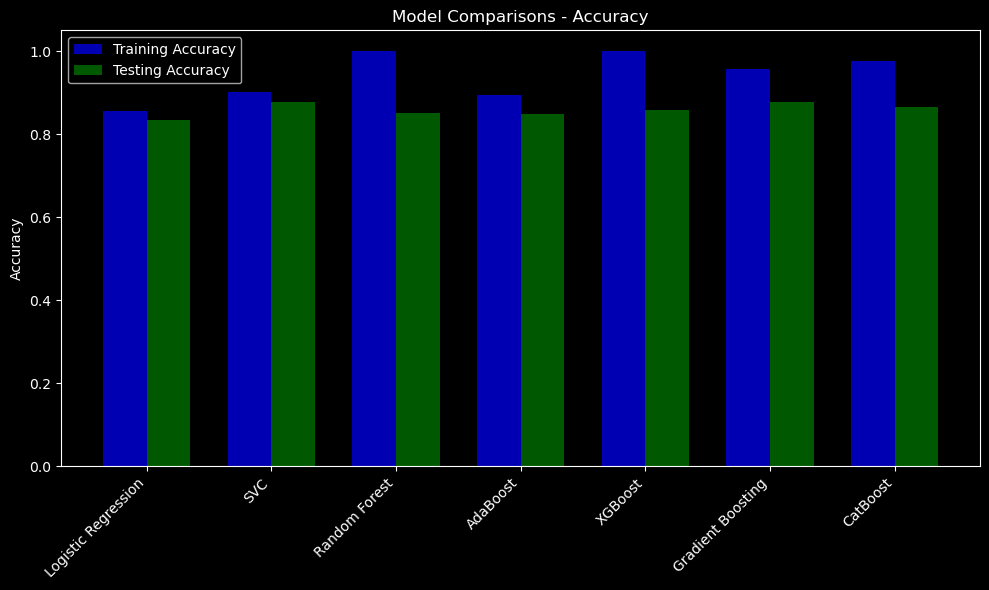

In [177]:
# Plot model performance
plt.figure(figsize=(10, 6))
width = 0.35  # the width of the bars
plt.bar([i - width/2 for i in range(len(model_names))], train_results, width, alpha=0.7, label="Training Accuracy", color='b')
plt.bar([i + width/2 for i in range(len(model_names))], test_results, width, alpha=0.7, label="Testing Accuracy", color='g')
plt.ylabel("Accuracy")
plt.xticks(range(len(model_names)), model_names, rotation=45, ha="right")
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.tight_layout()
plt.show()


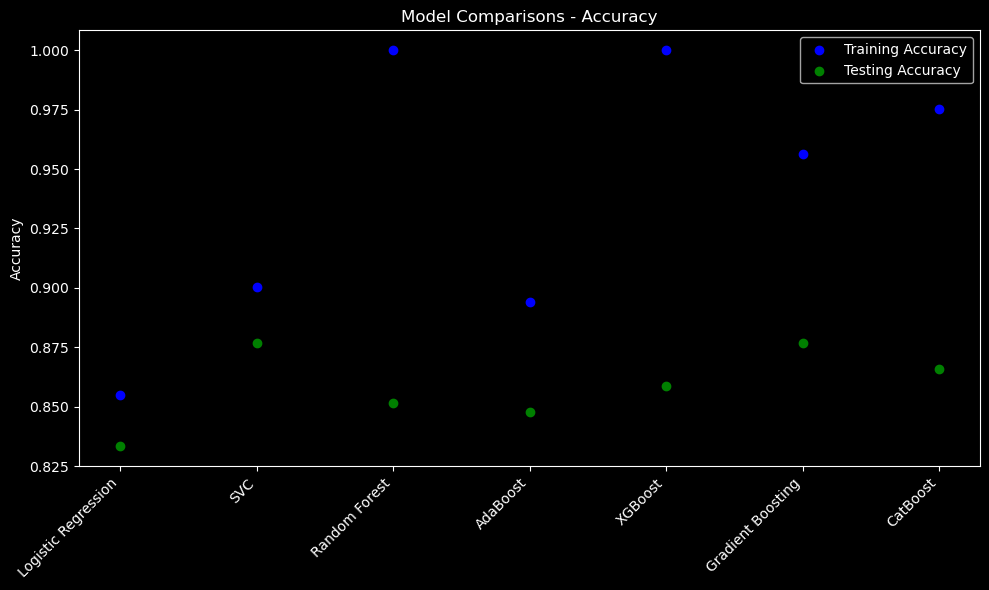

In [178]:
# Plot model performance
plt.figure(figsize=(10, 6))
plt.scatter(model_names, train_results, marker='o', label="Training Accuracy", color='b')
plt.scatter(model_names, test_results, marker='o', label="Testing Accuracy", color='g')
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.tight_layout()
plt.show()


In [179]:
pickle.dump(SVC_Model, open('Dr.Cardiologist.pkl', 'wb'))
pickled_model = pickle.load(open('Dr.Cardiologist.pkl', 'rb'))
random_row = InputsData_After_Scaling.sample(n=1)
random_row

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
901,0.476173,2.032174,0.239657,1.0,0.361175,2.8,0.0,0.0,0.0,1.0,1.0


In [180]:
prediction = pickled_model.predict(random_row)
prediction

C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names



array([1], dtype=int64)

In [181]:
converter = pyttsx3.init()
converter.setProperty('rate', 120)
converter.setProperty('volume', 1)
if prediction == 1:
    converter.say("Hello Mahmoud Ragab, Be careful. This person whose data you entered may suffer from heart failure in the future, and you must advise him to go to the doctor for follow-up.")
elif prediction == 0:
    converter.say("Hello Mahmoud Ragab, this person whose data was entered is considered a normal person. Do not worry about him, he is fine, but I advise him to maintain his health.")
converter.say("For your safety, I am just a machine learning model, but I am here to help you. You should consult doctors regarding the results I show you. Thank you for using “Dr. Cardiologist”")
converter.runAndWait()